# Introduction:Email spam classifier
Clicking on a spam email can be dangerous, exposing your computer and personal information to different types of malware. Therefore, it’s important to implement additional safety measures to protect your device, especially when it handles sensitive information like user data.

First, we’ll import the necessary dependencies. Pandas is a library used mostly used by data scientists for data cleaning and analysis.

In [109]:
#importing essential libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,power_transform
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import pickle

## Loading the dataset:

In [110]:
df=pd.read_csv(r'file:///C:\Users\anand\Downloads\Spam-Project\Spam%20Project\Spam%20Data\spam.csv',encoding = "cp1252")

In [111]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## checking null values:

In [113]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [114]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [115]:
#removing unwanted columns
df.drop(['Unnamed: 2'],axis=1,inplace=True)
df.drop(['Unnamed: 3'],axis=1,inplace=True)
df.drop(['Unnamed: 4'],axis=1,inplace=True)         

v1    0
v2    0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


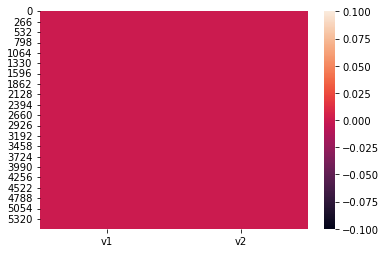

In [116]:
# checking null values again to check whether any null values
print(df.isnull().sum())
print(sns.heatmap(df.isnull()))

We do not require the columns ‘Unnamed: 2’, ‘Unnamed: 3’ and ‘Unnamed: 4’, so we remove them. We rename the column ‘v1’ as ‘label’ and ‘v2’ as ‘Emailtext’. ‘ham’ is replaced by 0 and ‘spam’ is replaced by 1 in the ‘label’ column. 

## Encoding:

In [117]:
df['v1']=df['v1'].replace(['spam','ham'],['1','0'])

In [118]:
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [119]:
df.rename(columns={'v1': 'label', 'v2': 'Emailtext'}, inplace=True)

In [120]:
# Finally we obtain the following dataframe.
df

,label,Emailtext
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [121]:
df.describe(include = 'all')

,label,Emailtext
count,5572,5572
unique,2,5169
top,0,"Sorry, I'll call later"
freq,4825,30


In [122]:
df.groupby('label').describe()

Emailtext                                                               
          count unique                                                top freq
label                                                                         
0          4825   4516                             Sorry, I'll call later   30
1           747    653  Please call our customer service representativ...    4

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm


x = df['Emailtext']
y = df["label"]
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2)

cv = CountVectorizer()
features = cv.fit_transform(x_train)

model = svm.SVC()
model.fit(features,y_train)

features_test = cv.transform(x_test)
print(model.score(features_test,y_test))

0.9757847533632287


SVM, the support vector machine algorithm, is a linear model for classification and regression. The idea of SVM is simple, the algorithm creates a line, or a hyperplane, which separates the data into classes. SVM can solve both linear and non-linear problems

we learned how to o build and run our model, comparing our predictions against the actual output. Finally, we tested our model using count vectorization.
the model accuracy is 97 %.
we were able to classify spam with 97 percent accuracy.